# Data cleaning - bonus challenge

In [12]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

In [33]:
df = pd.read_csv('iris-data.csv')

In [34]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking dtypes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Checking missing values

In [36]:
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [37]:
df.shape

(150, 5)

In [38]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df[df['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [40]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

#### Fixing the class name of versicolor and setosa

In [41]:
changing_names = {'versicolor':'Iris-versicolor', 'Iris-setossa':'Iris-setosa'}

df = df.replace(changing_names)

In [42]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

#### droping the nans

In [43]:
df_without_nan = df.dropna()

In [44]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


#### Checking if there are differences in sepal with among the classes

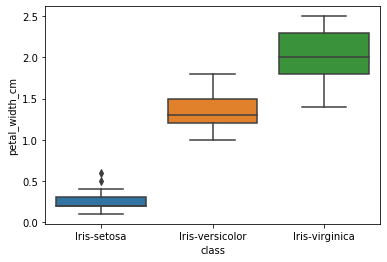

In [45]:
sns.boxplot(data=df, x='class', y='petal_width_cm')

In [46]:
df_setosa = df_without_nan[df_without_nan["class"] == "Iris-setosa"][["petal_length_cm","petal_width_cm"]]

In [47]:
df_setosa.head()

,petal_length_cm,petal_width_cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [49]:
df_setosa.describe()

,petal_length_cm,petal_width_cm
count,45.000000,45.000000
mean,1.460000,0.251111
std,0.181409,0.110005
min,1.000000,0.100000
25%,1.400000,0.200000
50%,1.500000,0.200000
75%,1.600000,0.300000
max,1.900000,0.600000


#### Interpolating the NaNs values with the median value of the setosa class

In [57]:
df = df.fillna(df['petal_width_cm'][df['class']=='Iris-setosa'].median())

In [59]:
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

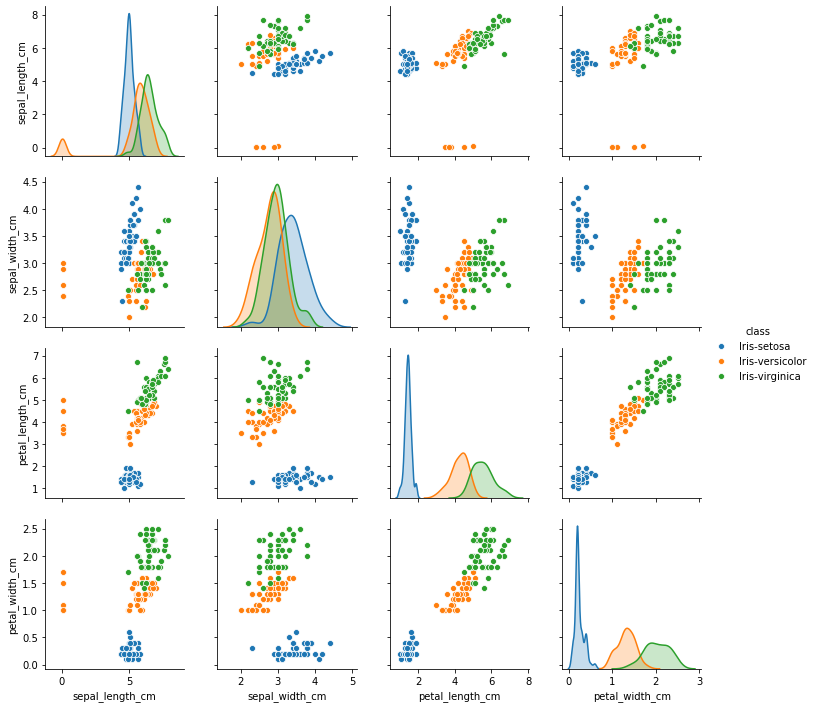

In [60]:
sns.pairplot(df, hue="class", height=2.5)

#### Removing those observations with sepal lenght lower than 0.1 since they are outliers or just wrong data

In [62]:
df_clean = df.drop(df[df['sepal_length_cm']<= 0.1].index)

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


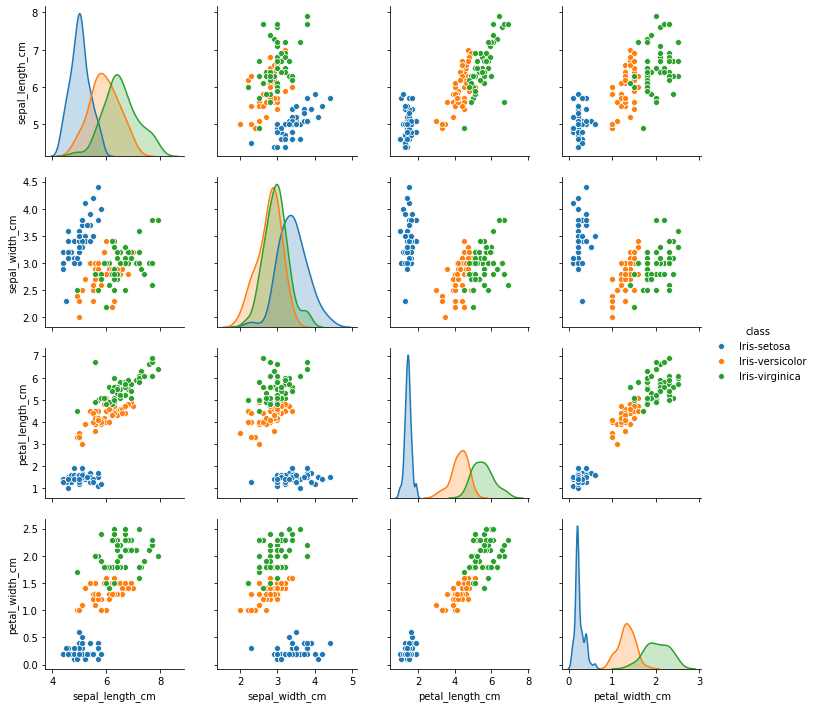

In [64]:
sns.pairplot(df_clean, hue="class", height=2.5)